### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import urllib.request
import json
import sqldf
from distance_km import get_distance
from cum_histogram import get_cumulative_histogram
from post_codes import get_data_from_post_codes
from Lon_Lat import get_data_from_lon_lat
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

In [2]:
df = get_data_from_post_codes("CB9 788")
df

In [3]:
df = get_data_from_lon_lat(0.452056, 52.09279)
df

,postcode,quality,eastings,northings,country,nhs_ha,longitude,latitude,european_electoral_region,primary_care_trust,region,lsoa,msoa,incode,outcode,parliamentary_constituency,parliamentary_constituency_2024,admin_district,parish,admin_county,date_of_introduction,admin_ward,ced,ccg,nuts,pfa,distance,codes.admin_district,codes.admin_county,codes.admin_ward,codes.parish,codes.parliamentary_constituency,codes.parliamentary_constituency_2024,codes.ccg,codes.ccg_id,codes.ced,codes.nuts,codes.lsoa,codes.msoa,codes.lau2,codes.pfa
0,CB9 7UE,1,568074,246662,England,East of England,0.452056,52.092790,Eastern,Suffolk,East of England,St Edmundsbury 011C,St Edmundsbury 011,7UE,CB9,West Suffolk,West Suffolk,West Suffolk,Haverhill,Suffolk,202109,Haverhill East,Haverhill East and Kedington,NHS Suffolk and North East Essex,West Suffolk,Suffolk,0.000000,E07000245,E10000029,E05012775,E04012716,E14001034,E14001578,E38000204,07K,E58001751,TLH14,E01030151,E02006283,E07000245,E23000025
1,CB9 7UF,1,568055,246690,England,East of England,0.451793,52.093048,Eastern,Suffolk,East of England,St Edmundsbury 011C,St Edmundsbury 011,7UF,CB9,West Suffolk,West Suffolk,West Suffolk,Haverhill,Suffolk,202204,Haverhill East,Haverhill East and Kedington,NHS Suffolk and North East Essex,West Suffolk,Suffolk,33.897103,E07000245,E10000029,E05012775,E04012716,E14001034,E14001578,E38000204,07K,E58001751,TLH14,E01030151,E02006283,E07000245,E23000025


### Load Data

In [21]:
### GPS Data

df_GPS = pd.read_csv('GPS_data.csv')

print(df_GPS.shape)

df_GPS.head()

(641662, 4)


,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09T19:25:00.000+0100
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09T19:40:00.000+0100
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09T19:55:00.000+0100
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09T20:10:00.000+0100
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09T20:25:00.000+0100


In [22]:
df_GPS.dtypes

SHIPMENT_NUMBER      object
LAT                 float64
LON                 float64
RECORD_TIMESTAMP     object
dtype: object

In [23]:
df_GPS['RECORD_TIMESTAMP_lcl'] = pd.to_datetime(df_GPS['RECORD_TIMESTAMP'], errors='coerce', utc='True')

df_GPS.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP,RECORD_TIMESTAMP_lcl
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09T19:25:00.000+0100,2023-10-09 18:25:00+00:00
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09T19:40:00.000+0100,2023-10-09 18:40:00+00:00
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09T19:55:00.000+0100,2023-10-09 18:55:00+00:00
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09T20:10:00.000+0100,2023-10-09 19:10:00+00:00
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09T20:25:00.000+0100,2023-10-09 19:25:00+00:00


In [3]:
### Shipment Bookings (sb) Data

df_sb = pd.read_csv('Shipment_bookings.csv')

print(df_sb.shape)

df_sb.head()

(3245, 15)


,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19T14:20:00.000Z,2023-12-19T16:00:00.000Z,2023-12-20T06:00:00.000Z,2023-12-20T08:56:00.000Z
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14T01:20:00.000Z,2023-12-14T03:00:00.000Z,2023-12-14T07:03:00.000Z,2023-12-14T10:43:00.000Z
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13T09:00:00.000Z,2023-12-13T09:30:00.000Z,2023-12-13T15:30:00.000Z,2023-12-13T16:00:00.000Z
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07T14:00:00.000Z,2023-11-07T15:00:00.000Z,2023-11-07T23:00:00.000Z,2023-11-07T23:59:00.000Z


In [4]:
### New Bookings (nb) Data

df_nb = pd.read_csv('New_bookings.csv')

print(df_nb.shape)

df_nb.head()

(1000, 15)


,SHIPMENT_NUMBER,SHIPPER_ID,CARRIER_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,SEZHUK-240118-283413,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Box,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-18T18:00:00.000Z,2024-01-18T23:00:00.000Z,2024-01-19T12:00:00.000Z,2024-01-19T13:00:00.000Z
1,SEZHUK-240111-281159,192cd5b5-978c-4681-b206-2f4d04e081ec,CAUK000876,Tractor Unit,Curtain-Side 13.6M Trailer,LS24 9SD,BT26 6JJ,53.882244,-1.267537,54.474078,-6.104285,2024-01-12T10:00:00.000Z,2024-01-16T07:00:00.000Z,2024-01-16T07:30:00.000Z,2024-01-16T08:00:00.000Z
2,SEZHUK-240110-280958,ee7cbc7b-4f14-44ac-9c6e-086d70a27141,CAUK000872,Tractor Unit,Curtain-Side 13.6M Trailer,DUBLIN,DN3 3FF,53.407411,-6.238118,53.537912,-1.033570,2024-01-11T15:03:00.000Z,2024-01-11T15:33:00.000Z,2024-01-12T14:33:00.000Z,2024-01-12T15:03:00.000Z
3,SEZHUK-240115-282151,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,DUBLIN,53.293393,-1.074008,53.294121,-6.441900,2024-01-16T06:00:00.000Z,2024-01-16T06:59:00.000Z,2024-01-18T11:01:00.000Z,2024-01-18T11:31:00.000Z
4,SEZHUK-240110-280768,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Curtain-Side 13.6M Trailer,S80 3FY,BT36 7LQ,53.293393,-1.074008,54.664518,-5.932184,2024-01-11T06:00:00.000Z,2024-01-11T06:59:00.000Z,2024-01-15T07:25:00.000Z,2024-01-15T07:55:00.000Z


### Task 1

Operational teams rely on KPIs like on-time collection and on-time delivery to gauge carrier performance. What percentage of shipments met the on-time delivery threshold (arriving no later than 30 minutes past the scheduled delivery window) between October 1st and December 31st, 2023? Please outline your assumptions.

### Exploratory Data Analysis for Task 1

In [5]:
query_1 = """select count(distinct PROJECT_ID) as project_count
                  ,count(distinct SHIPMENT_NUMBER) as shipment_count      
            from df_sb"""
 
output_1 = sqldf.run(query_1)

output_1

,project_count,shipment_count
0,49,3245


In [6]:
query_2 = """SELECT COUNT(DISTINCT gps.SHIPMENT_NUMBER) FROM df_GPS AS gps
             inner join df_sb AS sb 
             on gps.SHIPMENT_NUMBER = sb.SHIPMENT_NUMBER"""
 
output_2 = sqldf.run(query_2)

output_2

,COUNT(DISTINCT gps.SHIPMENT_NUMBER)
0,3245


In [7]:
query_3 = """select sb.*, gps.LAT, gps.LON, gps.RECORD_TIMESTAMP     
            from df_sb AS sb
            left join df_GPS AS gps
            on sb.SHIPMENT_NUMBER = gps.SHIPMENT_NUMBER AND round(sb.LAST_DELIVERY_LATITUDE,2) = round(gps.LAT,2) \
            AND round(sb.LAST_DELIVERY_LONGITUDE,2) = round(gps.LON,2)"""
 
output_3 = sqldf.run(query_3)

query_4 = """select count(distinct SHIPMENT_NUMBER) from output_3 where LAT is NULL OR LON IS NULL"""

output_4 = sqldf.run(query_4)

output_4   

,count(distinct SHIPMENT_NUMBER)
0,1369


In [8]:
query_5 = """select sb.*, gps.LAT, gps.LON, gps.RECORD_TIMESTAMP     
            from df_sb AS sb
            left join df_GPS AS gps
            on sb.SHIPMENT_NUMBER = gps.SHIPMENT_NUMBER AND round(sb.LAST_DELIVERY_LATITUDE,1) = round(gps.LAT,1) \
            AND round(sb.LAST_DELIVERY_LONGITUDE,1) = round(gps.LON,1)"""
 
output_5 = sqldf.run(query_5)

query_6 = """select count(distinct SHIPMENT_NUMBER) from output_5 where LAT is NULL OR LON IS NULL"""

output_6 = sqldf.run(query_6)

output_6   

,count(distinct SHIPMENT_NUMBER)
0,817


In [9]:
query_7 = """select sb.*, gps.LAT, gps.LON, gps.RECORD_TIMESTAMP     
            from df_sb AS sb
            left join df_GPS AS gps
            on sb.SHIPMENT_NUMBER = gps.SHIPMENT_NUMBER"""
 
output_7 = sqldf.run(query_7)

print(output_7.shape)

output_7.head()

(641662, 19)


,index,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LAT,LON,RECORD_TIMESTAMP
0,0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316349,-0.156690,2023-10-06T09:58:00.000+0100
1,0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316440,-0.157995,2023-10-06T10:05:00.000+0100
2,0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316544,-0.157263,2023-10-06T10:24:00.000+0100
3,0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316602,-0.157301,2023-10-06T10:03:00.000+0100
4,1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19T14:20:00.000Z,2023-12-19T16:00:00.000Z,2023-12-20T06:00:00.000Z,2023-12-20T08:56:00.000Z,53.408830,-1.365270,2023-12-20T03:51:00.000Z


In [10]:
output_7 = get_distance(output_7)

output_7.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LAT,LON,RECORD_TIMESTAMP,distance
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316349,-0.156690,2023-10-06T09:58:00.000+0100,456.815026
1,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316440,-0.157995,2023-10-06T10:05:00.000+0100,456.763771
2,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316544,-0.157263,2023-10-06T10:24:00.000+0100,456.777358
3,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06T09:45:00.000Z,2023-10-06T10:00:00.000Z,2023-10-09T09:55:00.000Z,2023-10-09T10:25:00.000Z,52.316602,-0.157301,2023-10-06T10:03:00.000+0100,456.770483
4,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19T14:20:00.000Z,2023-12-19T16:00:00.000Z,2023-12-20T06:00:00.000Z,2023-12-20T08:56:00.000Z,53.408830,-1.365270,2023-12-20T03:51:00.000Z,223.752409


In [11]:
query_8 = """select SHIPMENT_NUMBER, MIN(distance) AS min_distance 
            from output_7
            group by 1
            """
 
output_8 = sqldf.run(query_8)

print(output_8.shape)

output_8.head()

(3245, 2)


,SHIPMENT_NUMBER,min_distance
0,SEZHUK-230918-245388,1.233151
1,SEZHUK-230919-245487,0.025140
2,SEZHUK-230919-245488,0.147250
3,SEZHUK-230919-245489,0.052472
4,SEZHUK-230919-245490,0.286499


In [12]:
output_8[['min_distance']].describe([.01,.1,.2,.3,.4,.5,.6,.7,0.71,0.72,0.73,0.74,0.75,.8,.9,.99])

,min_distance
count,3245.000000
mean,35.950678
std,159.874886
min,0.001202
1%,0.007190
10%,0.030458
20%,0.057397
30%,0.079459
40%,0.111011
50%,0.165654


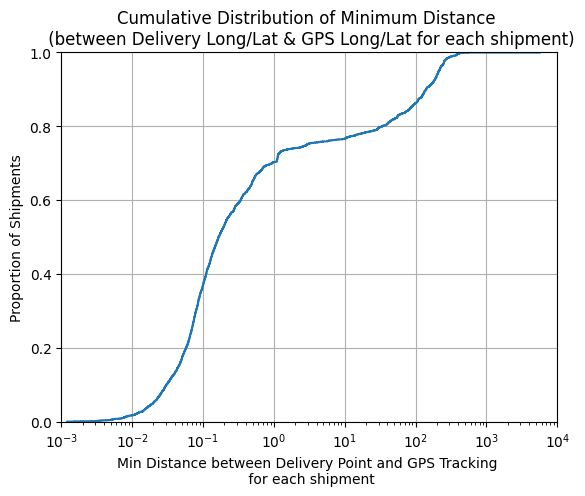

In [13]:
get_cumulative_histogram(output_8)

In [14]:
query_9 = """select sb.*, gps.LAT, gps.LON, gps.RECORD_TIMESTAMP     
            from df_sb AS sb
            left join df_GPS AS gps
            on sb.SHIPMENT_NUMBER = gps.SHIPMENT_NUMBER AND round(sb.LAST_DELIVERY_LATITUDE,2) = round(gps.LAT,2) \
            AND round(sb.LAST_DELIVERY_LONGITUDE,2) = round(gps.LON,2)"""
 
output_9 = sqldf.run(query_9)

output_9 = get_distance(output_9)

query_10 = """select SHIPMENT_NUMBER, MIN(distance) AS min_distance 
            from output_9
            where distance is not null
            group by 1
            """
 
output_10 = sqldf.run(query_10)

print(output_10.shape)

output_10.head()

(1876, 2)


,SHIPMENT_NUMBER,min_distance
0,SEZHUK-230919-245487,0.025140
1,SEZHUK-230919-245488,0.147250
2,SEZHUK-230919-245489,0.052472
3,SEZHUK-230919-245490,0.286499
4,SEZHUK-230919-245491,0.285145


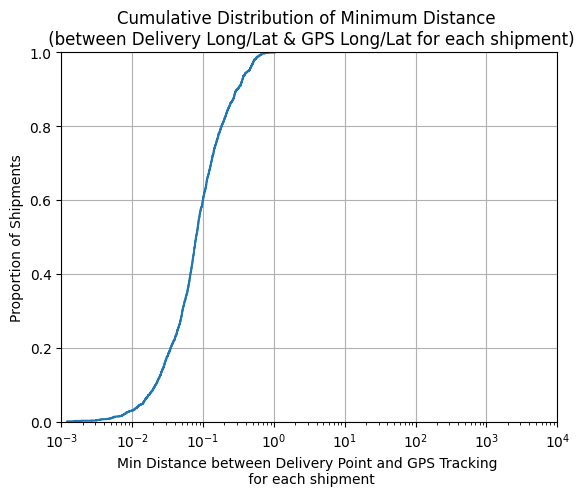

In [15]:
get_cumulative_histogram(output_10)

In [16]:
output_10.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,min_distance
count,1876.000000
mean,0.126243
std,0.132008
min,0.001202
1%,0.005128
10%,0.021540
20%,0.035010
30%,0.051293
40%,0.066379
50%,0.079798


In [17]:
output_10[output_10.min_distance > 1].shape

(1, 2)

In [18]:
query_11a = """select SHIPMENT_NUMBER, max(RECORD_TIMESTAMP) as RECORD_TIMESTAMP
              from df_GPS
              group by 1"""

output_11a = sqldf.run(query_11a)

query_11b = """select gps_a.*
              from df_GPS AS gps_a
              join output_11a AS gps_b
              on gps_a.SHIPMENT_NUMBER = gps_b.SHIPMENT_NUMBER AND gps_a.RECORD_TIMESTAMP = gps_b.RECORD_TIMESTAMP"""

output_11b = sqldf.run(query_11b)

print(output_11b.shape)

output_11b.head()

(3245, 5)


,index,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,13,SEZHUK-230918-245388,52.277015,-8.276215,2023-10-11T11:50:00.000+0100
1,118,SEZHUK-230919-245487,53.260643,-1.318575,2023-11-30T15:59:00.000Z
2,185,SEZHUK-230919-245488,53.259834,-1.319917,2023-10-12T13:08:00.000+0100
3,251,SEZHUK-230919-245489,52.907932,-1.462328,2023-11-09T17:51:00.000Z
4,308,SEZHUK-230919-245490,53.260650,-1.318117,2023-11-02T16:29:00.000Z


In [19]:
query_12 = """select sb.*, gps.LAT, gps.LON, gps.RECORD_TIMESTAMP     
            from df_sb AS sb
            left join output_11b AS gps
            on sb.SHIPMENT_NUMBER = gps.SHIPMENT_NUMBER"""
 
output_12 = sqldf.run(query_12)

output_12 = get_distance(output_12)

query_13 = """select SHIPMENT_NUMBER, MIN(distance) AS min_distance 
            from output_12
            where distance is not null
            group by 1
            """
 
output_13 = sqldf.run(query_13)

print(output_13.shape)

output_13.head()

(3245, 2)


,SHIPMENT_NUMBER,min_distance
0,SEZHUK-230918-245388,1.233151
1,SEZHUK-230919-245487,0.268415
2,SEZHUK-230919-245488,0.147250
3,SEZHUK-230919-245489,40.135800
4,SEZHUK-230919-245490,0.286499


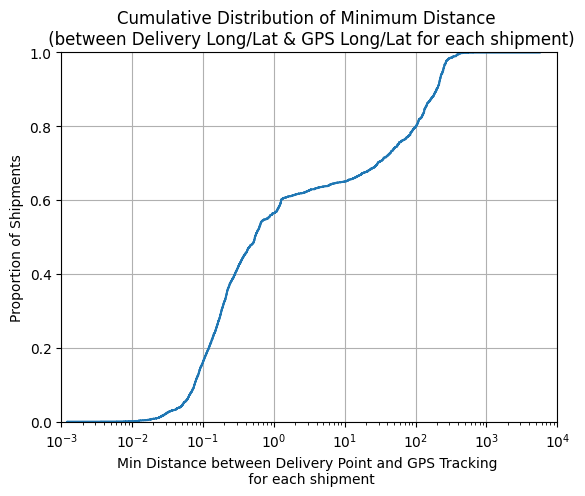

In [20]:
get_cumulative_histogram(output_13)